In [1]:
import os
import numpy as np

import analysis_utils as utils

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cohort = 'cohort_2_v2'
to_analyze = 'full_clean'
data_dir = '/Users/rebekahzhang/Documents/shuler_lab/behavior_data'
data_folder = os.path.join(data_dir, cohort, to_analyze)
print(data_folder)

/Users/rebekahzhang/Documents/shuler_lab/behavior_data/cohort_2_v2/full_clean


## load session log

In [3]:
training_session_log = utils.load_session_log(data_folder, 'training_sessions.csv')

make mouse list

In [4]:
mouse_list = utils.generate_mouse_list(training_session_log)

['RZ012', 'RZ013', 'RZ015', 'RZ016', 'RZ017']


In [30]:
dir_name = training_session_log.dir[1]
file_name = training_session_log.filename[1]
processed_session = utils.load_processed_session(data_folder, dir_name, file_name)

In [31]:
def calculate_time_by_wait(group):
    wait_start_time = group.loc[(group['key'] == 'wait') & (group['value'] == 1), 'trial_time'].iloc[0]
    group['time_by_wait'] = group['trial_time'] - wait_start_time
    return group

processed_session = processed_session.groupby('session_trial_num', group_keys=True).apply(calculate_time_by_wait)

# processed_session.reset_index(drop=True, inplace=True)

In [32]:
processed_session

session_time  block_num  session_trial_num  \
session_trial_num                                                     
0.0               2      1.685640e+09        0.0                0.0   
                  3      1.685640e+09        0.0                0.0   
                  4      1.685640e+09        0.0                0.0   
                  5      1.685640e+09        0.0                0.0   
                  6      1.685640e+09        0.0                0.0   
...                               ...        ...                ...   
321.0             22229  1.685642e+09        1.0              321.0   
                  22230  1.685642e+09        1.0              321.0   
                  22231  1.685642e+09        1.0              321.0   
                  22232  1.685642e+09        1.0              321.0   
                  22233  1.685643e+09        1.0              321.0   

                         block_trial_num             state  time_bg  \
session_trial_num                                                     
0.0               2                  0.0              None      3.5   
                  3                  0.0     in_background      3.5   
                  4                  0.0     in_background      NaN   
                  5                  0.0     in_background      NaN   
                  6                  0.0     in_background      NaN   
...                                  ...               ...      ...   
321.0             22229            158.0     in_background      1.0   
                  22230            158.0     in_background      NaN   
                  22231            158.0     in_background      NaN   
                  22232            158.0     in_background      1.0   
                  22233            158.0  trial_transition      1.0   

                         reward_size  value         key  trial_time  \
session_trial_num                                                     
0.0               2              NaN      1       trial    0.000000   
                  3              NaN      1  background    0.000084   
                  4              NaN      1      visual    0.007220   
                  5              NaN      1        lick    0.076821   
                  6              NaN      0        lick    0.148685   
...                              ...    ...         ...         ...   
321.0             22229          NaN      1  background    0.000090   
                  22230          NaN      1      visual    0.007159   
                  22231          NaN      0      visual    1.007125   
                  22232          NaN      1        wait    1.007260   
                  22233          NaN      0       trial   11.007278   

                         time_by_wait  
session_trial_num                      
0.0               2         -3.506905  
                  3         -3.506821  
                  4         -3.499685  
                  5         -3.430084  
                  6         -3.358220  
...                               ...  
321.0             22229     -1.007170  
                  22230     -1.000102  
                  22231     -0.000135  
                  22232      0.000000  
                  22233     10.000018  

[22232 rows x 11 columns]

In [33]:
licks = processed_session.loc[(processed_session['key'] == 'lick') & (processed_session['value'] == 1)]
pumps = processed_session.loc[(processed_session['key'] == 'pump') & (processed_session['value'] == 1)]

In [35]:
licks

session_time  block_num  session_trial_num  \
session_trial_num                                                     
0.0               5      1.685640e+09        0.0                0.0   
                  7      1.685640e+09        0.0                0.0   
                  9      1.685640e+09        0.0                0.0   
                  11     1.685640e+09        0.0                0.0   
                  13     1.685640e+09        0.0                0.0   
...                               ...        ...                ...   
320.0             22217  1.685642e+09        1.0              320.0   
                  22219  1.685642e+09        1.0              320.0   
                  22221  1.685642e+09        1.0              320.0   
                  22223  1.685642e+09        1.0              320.0   
                  22225  1.685642e+09        1.0              320.0   

                         block_trial_num           state  time_bg  \
session_trial_num                                                   
0.0               5                  0.0   in_background      NaN   
                  7                  0.0   in_background      NaN   
                  9                  0.0   in_background      NaN   
                  11                 0.0   in_background      NaN   
                  13                 0.0   in_background      NaN   
...                                  ...             ...      ...   
320.0             22217            157.0  in_consumption      NaN   
                  22219            157.0  in_consumption      NaN   
                  22221            157.0  in_consumption      NaN   
                  22223            157.0  in_consumption      NaN   
                  22225            157.0  in_consumption      NaN   

                         reward_size  value   key  trial_time  time_by_wait  
session_trial_num                                                            
0.0               5              NaN      1  lick    0.076821     -3.430084  
                  7              NaN      1  lick    0.371234     -3.135670  
                  9              NaN      1  lick    0.657429     -2.849476  
                  11             NaN      1  lick    0.812909     -2.693996  
                  13             NaN      1  lick    2.930541     -0.576364  
...                              ...    ...   ...         ...           ...  
320.0             22217          NaN      1  lick    4.525612      3.618351  
                  22219          NaN      1  lick    4.673533      3.766272  
                  22221          NaN      1  lick    4.858355      3.951095  
                  22223          NaN      1  lick    5.046147      4.138886  
                  22225          NaN      1  lick    5.180140      4.272880  

[4614 rows x 11 columns]

In [34]:
plt.figure()
plt.eventplot([trial['time_by_wait'].tolist() for _, trial in licks], colors='b')
plt.eventplot([trial['time_by_wait'].tolist() for _, trial in pumps], colors='r')
plt.xlabel('Time')
plt.ylabel('Trials')
plt.title('Events of Each Trial')
plt.tight_layout()
plt.show()

ValueError: too many values to unpack (expected 2)

<Figure size 432x288 with 0 Axes>

/var/folders/jf/_0n_zq0x43xgvnjkfyzxmpm40000gn/T/ipykernel_98292/941675650.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  licks['time_by_wait'] = licks['time_by_wait'].apply(lambda x: [x] if isinstance(x, (float, int)) else x)
/var/folders/jf/_0n_zq0x43xgvnjkfyzxmpm40000gn/T/ipykernel_98292/941675650.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pumps['time_by_wait'] = pumps['time_by_wait'].apply(lambda x: [x] if isinstance(x, (float, int)) else x)


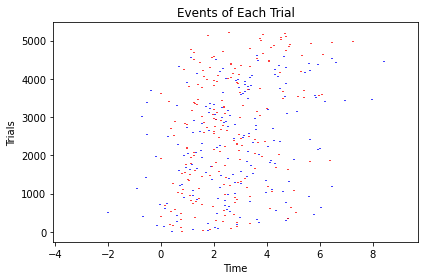

In [41]:
processed_session = utils.load_processed_session(data_folder, dir_name, file_name)

def calculate_time_by_wait(group):
    # Ensure that the groupby operation produces a DataFrame with 'time_by_wait' and other columns
    wait_start_time = group.loc[(group['key'] == 'wait') & (group['value'] == 1), 'trial_time'].iloc[0]
    group['time_by_wait'] = group['trial_time'] - wait_start_time
    return group

# Group by 'session_trial_num' and apply the calculate_time_by_wait function
processed_session = processed_session.groupby('session_trial_num', group_keys=True).apply(calculate_time_by_wait)

# Filter data for licks and pumps
licks = processed_session.loc[(processed_session['key'] == 'lick') & (processed_session['value'] == 1)]
pumps = processed_session.loc[(processed_session['key'] == 'pump') & (processed_session['value'] == 1)]

# Convert 'time_by_wait' column to lists, handling single float values
licks['time_by_wait'] = licks['time_by_wait'].apply(lambda x: [x] if isinstance(x, (float, int)) else x)
pumps['time_by_wait'] = pumps['time_by_wait'].apply(lambda x: [x] if isinstance(x, (float, int)) else x)

# Plot the event data
plt.figure()
plt.eventplot(licks['time_by_wait'].tolist(), colors='b')
plt.eventplot(pumps['time_by_wait'].tolist(), colors='r')
plt.xlabel('Time')
plt.ylabel('Trials')
plt.title('Events of Each Trial')
plt.tight_layout()
plt.show()

In [39]:
licks.get_group(12)

AttributeError: 'DataFrame' object has no attribute 'get_group'

In [17]:
processed_session

,session_time,block_num,session_trial_num,block_trial_num,state,time_bg,reward_size,value,key
0,1.685640e+09,-1.0,-1.0,-1.0,None,None,NaN,1,session
1,1.685640e+09,-1.0,-1.0,-1.0,None,None,NaN,1,block
2,1.685640e+09,0.0,0.0,0.0,None,3.5,NaN,1,trial
3,1.685640e+09,0.0,0.0,0.0,in_background,3.5,NaN,1,background
4,1.685640e+09,0.0,0.0,0.0,in_background,NaN,NaN,1,visual
...,...,...,...,...,...,...,...,...,...
22236,1.685643e+09,NaN,NaN,NaN,NaN,NaN,NaN,1,visual
22237,1.685643e+09,NaN,NaN,NaN,NaN,NaN,NaN,0,visual
22238,1.685643e+09,1.0,322.0,159.0,in_wait,0.9,NaN,1,wait
22239,1.685643e+09,1.0,322.0,159.0,trial_transition,0.9,NaN,0,trial


In [35]:
total_trial_num = 321
processed_session_test = processed_session.loc[processed_session.session_trial_num <= total_trial_num]

In [36]:
processed_session_test

,session_time,block_num,session_trial_num,block_trial_num,state,time_bg,reward_size,value,key
0,1.685640e+09,-1.0,-1.0,-1.0,None,None,NaN,1,session
1,1.685640e+09,-1.0,-1.0,-1.0,None,None,NaN,1,block
2,1.685640e+09,0.0,0.0,0.0,None,3.5,NaN,1,trial
3,1.685640e+09,0.0,0.0,0.0,in_background,3.5,NaN,1,background
4,1.685640e+09,0.0,0.0,0.0,in_background,NaN,NaN,1,visual
...,...,...,...,...,...,...,...,...,...
22229,1.685642e+09,1.0,321.0,158.0,in_background,1.0,NaN,1,background
22230,1.685642e+09,1.0,321.0,158.0,in_background,NaN,NaN,1,visual
22231,1.685642e+09,1.0,321.0,158.0,in_background,NaN,NaN,0,visual
22232,1.685642e+09,1.0,321.0,158.0,in_background,1.0,NaN,1,wait


In [38]:
grouped = processed_session_test.groupby('session_trial_num')

In [ ]:
df = pd.DataFrame(data)
df['time_stamp'] = pd.to_datetime(df['time_stamp'])  # Convert time_stamp to datetime type

grouped = df.groupby('trial_number')

plt.figure(figsize=(10, 6))
plt.eventplot([group['time_stamp'].tolist() for _, group in grouped], linelengths=0.5, colors='b')
plt.xlabel('Time')
plt.ylabel('Trials')
plt.title('Events of Each Trial')
plt.tight_layout()
plt.show()

In [40]:
grouped.get_group(1)

,session_time,block_num,session_trial_num,block_trial_num,state,time_bg,reward_size,value,key
34,1.685640e+09,0.0,1.0,1.0,trial_transition,3.4,NaN,1,trial
35,1.685640e+09,0.0,1.0,1.0,in_background,3.4,NaN,1,background
36,1.685640e+09,0.0,1.0,1.0,in_background,NaN,NaN,1,visual
37,1.685640e+09,0.0,1.0,1.0,in_background,NaN,NaN,1,lick
38,1.685640e+09,0.0,1.0,1.0,in_background,NaN,NaN,0,lick
...,...,...,...,...,...,...,...,...,...
90,1.685640e+09,0.0,1.0,1.0,in_consumption,NaN,NaN,0,lick
91,1.685640e+09,0.0,1.0,1.0,in_consumption,NaN,NaN,1,lick
92,1.685640e+09,0.0,1.0,1.0,in_consumption,NaN,NaN,0,lick
93,1.685640e+09,0.0,1.0,1.0,in_consumption,NaN,NaN,1,lick
